In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('/content/training_data.csv')
df = pd.read_csv('/content/testing_data.csv')
df.head()

,title,category
0,Pom Pom Hair Band Rabbit Light Grey Decorative...,NaN
1,Mariposa Golf Ball Napkin Weight,NaN
2,Mediterranean Snack Food Roasted Garlic Hummuz...,NaN
3,John Deere 0071750GX22269 Genuine Original Equ...,NaN
4,"Protech Wood Cleanr Gl,PERFORMANCE COATINGS IN...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20188 entries, 0 to 20187
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20188 non-null  object
 1   category  20188 non-null  object
dtypes: object(2)
memory usage: 315.6+ KB


In [ ]:
text_df = df[['title', 'category']]
text_df.head()

,title,category
0,The Three Amigos,None
1,Home Essentials Blue Floral Glass Vintage Styl...,Home & Kitchen
2,Cooper Wiring Quiet Toggle Switch Single Pole ...,Tools & Home Improvement
3,Baseboarders&reg; Wall Brackets,Tools & Home Improvement
4,The Great Wave Off Kanagawa Custom Rectangle M...,Office Products


In [ ]:
text_df.shape

(20188, 2)

In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20188 entries, 0 to 20187
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20188 non-null  object
 1   category  20188 non-null  object
dtypes: object(2)
memory usage: 315.6+ KB


In [ ]:
text_df.isnull().sum()

title       0
category    0
dtype: int64

In [ ]:
text_df['category'][3]

'Tools & Home Improvement'

In [ ]:
text_df['category'] = text_df['category'].astype(str)

In [ ]:
print(text_df['category'].apply(lambda x: len(x.split(' '))).sum())

41974


In [ ]:
text_df.dropna(subset=['category'], inplace=True)

In [ ]:
text_df.isnull().sum()

title       0
category    0
dtype: int64

In [ ]:
text_df['length'] = text_df['category'].apply(len)
text_df.head()

,title,category,length
0,The Three Amigos,None,4
1,Home Essentials Blue Floral Glass Vintage Styl...,Home & Kitchen,14
2,Cooper Wiring Quiet Toggle Switch Single Pole ...,Tools & Home Improvement,24
3,Baseboarders&reg; Wall Brackets,Tools & Home Improvement,24
4,The Great Wave Off Kanagawa Custom Rectangle M...,Office Products,15


In [ ]:
text_df.title.unique()

array(['The Three Amigos',
       'Home Essentials Blue Floral Glass Vintage Style Water Goblet, Set of 4',
       'Cooper Wiring Quiet Toggle Switch Single Pole Lighted 15 A 120 V Ivory Ul Boxed',
       ..., 'Patriotic Flip Flop Ornament Assortment of 2',
       'Cybrtrayd Life of the Party A116 Horse Chocolate Candy Mold in Sealed Protective Poly Bag Imprinted with Copyrighted Cybrtrayd Molding Instructions',
       '4 Light Track Lighting Wall &amp; Ceiling Mount Fixture Kitchen and Dining Room'],
      dtype=object)

In [ ]:
text_df.title.value_counts()

Geocache Swag Glass Stone Refrigerator Magnets - Comic Book Hero's                                                     1
York Wallcoverings NV9727B Border Book Hollywood Border, Beige/Black/Off White/Red                                     1
We Got Nuts Walnuts in Shell 4 Pounds                                                                                  1
Philips 458653 60 Watt Equivalent Dimmable B12 Decorative Candle LED Light Bulb With Warm Glow Effect                  1
Suction Line Ball Strainer, 3/8 In.                                                                                    1
                                                                                                                      ..
Large USA Flag Patriotic Window Clings                                                                                 1
Maxwell House International Caf&eacute; Flavored Instant Coffee, Vanilla Bean Latte, 8.5 Ounce Canister (Pack of 8)    1
Record Clock - Recycled THE SUPR

In [ ]:
text_df.loc[text_df['title'].isin(['lipstick','lip_liner']),'title'] = 'lipstick'
text_df.loc[text_df['title'].isin(['blush','bronzer']),'title'] = 'contour'
text_df.loc[text_df['title'].isin(['eyeliner','eyeshadow','mascara','eyebrow']),'title'] = 'eye_makeup'

In [ ]:
text_df.title.value_counts()

Geocache Swag Glass Stone Refrigerator Magnets - Comic Book Hero's                                                     1
York Wallcoverings NV9727B Border Book Hollywood Border, Beige/Black/Off White/Red                                     1
We Got Nuts Walnuts in Shell 4 Pounds                                                                                  1
Philips 458653 60 Watt Equivalent Dimmable B12 Decorative Candle LED Light Bulb With Warm Glow Effect                  1
Suction Line Ball Strainer, 3/8 In.                                                                                    1
                                                                                                                      ..
Large USA Flag Patriotic Window Clings                                                                                 1
Maxwell House International Caf&eacute; Flavored Instant Coffee, Vanilla Bean Latte, 8.5 Ounce Canister (Pack of 8)    1
Record Clock - Recycled THE SUPR

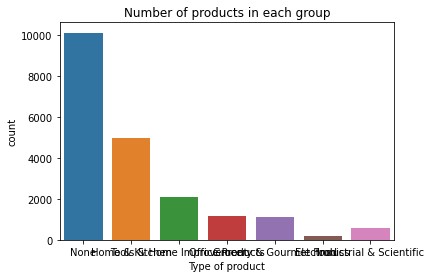

In [ ]:
sns.countplot(x='category',data=text_df)
plt.xlabel('Type of product')
plt.title('Number of products in each group');

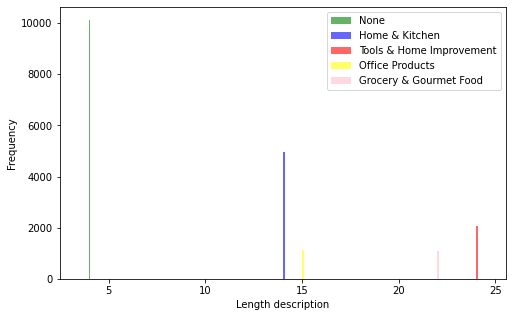

In [ ]:
plt.figure(figsize=(8, 5))
text_df[text_df.category == 'None'].length.plot(bins=35, kind='hist', color='green', label='None', alpha=0.6)
text_df[text_df.category == 'Home & Kitchen'].length.plot(kind='hist', color='blue', label='Home & Kitchen', alpha=0.6)
text_df[text_df.category == 'Tools & Home Improvement'].length.plot(kind='hist', color='red', label='Tools & Home Improvement', alpha=0.6)
text_df[text_df.category == 'Office Products'].length.plot(kind='hist', color='yellow', label='Office Products', alpha=0.6)
text_df[text_df.category == 'Grocery & Gourmet Food'].length.plot(kind='hist', color='pink', label='Grocery & Gourmet Food', alpha=0.6)
plt.legend()
plt.xlabel("Length description");

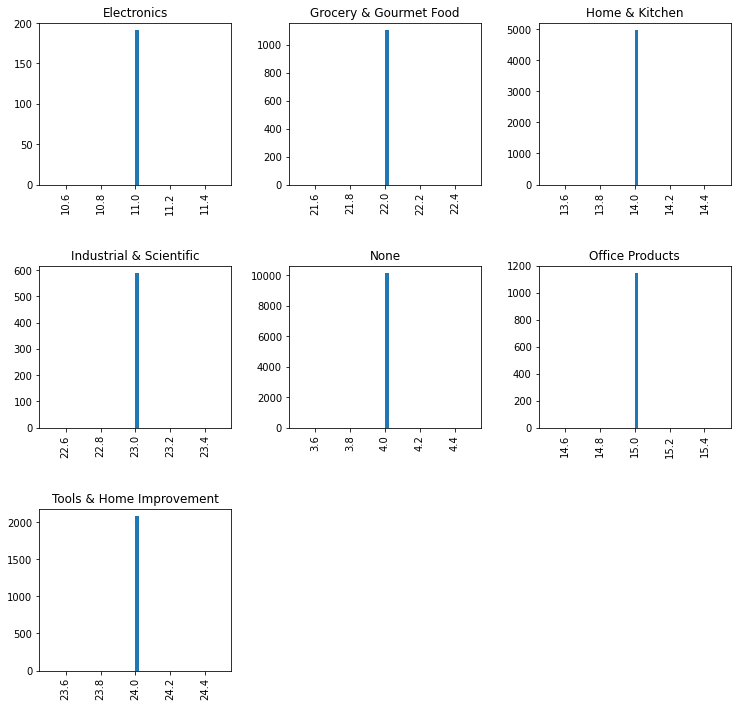

In [ ]:
text_df.hist(column='length', by='category', bins=50,figsize=(12,12));